<a href="https://colab.research.google.com/github/BHOSALEMAHADEV/Emotion-Detection-using-NLP-/blob/main/Emotion_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahadevbhosle
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp


In [7]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn


In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
import pandas as pd

df = pd.read_csv("/content/emotions-dataset-for-nlp/train.txt", sep=";", names=["text", "label"])
print(df.head())


                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [17]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())                      # Tokenization + Lowercase
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]  # Lemmatize + remove stopwords
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)


In [18]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.80      0.85       432
        fear       0.88      0.81      0.85       387
         joy       0.84      0.95      0.89      1072
        love       0.86      0.65      0.74       261
     sadness       0.90      0.93      0.91       933
    surprise       0.87      0.59      0.70       115

    accuracy                           0.87      3200
   macro avg       0.87      0.79      0.82      3200
weighted avg       0.87      0.87      0.87      3200



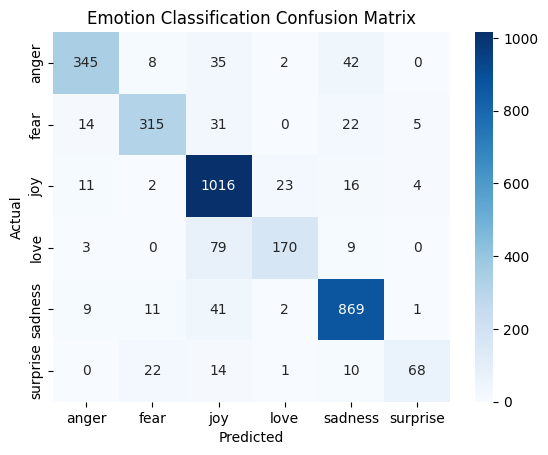

In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, xticklabels=model.classes_, yticklabels=model.classes_, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Emotion Classification Confusion Matrix")
plt.show()
